In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from datetime import datetime
import os
import dill
import shap
import matplotlib.pyplot as plt

/Users/kanchan/opt/anaconda3/envs/Dissertation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the selected features for each ticker
selected_features = {
    'BND_enrich.csv': ["3day MA", "Returns", "DGS10", "10day MA", "breakeven_rate", "VIXCLS", "month", "DFII10", "day", "IRLTLT01USM156N", "EMVMACROBUS", "Std_dev", "EMVOVERALLEMV", "CPALTT01USM661S", "PAYEMS", "EMVMACROINTEREST", "RBUSBIS"],
    'GLD_enrich.csv': ["Returns", "3day MA", "day", "Std_dev", "10day MA", "O-C", "month", "Volume", "EMVMACROINTEREST", "WALCL", "FEDFUNDS", "VIXCLS", "DGS3MO", "DGS10", "EMVMACROBUS", "PAYEMS", "CPALTT01USM661S", "EMVOVERALLEMV", "VOL", "year", "H-L", "GDPC1", "DFII10", "IRLTLT01USM156N", "RBUSBIS", "breakeven_rate", "Buy_Sell", "Buy_Sell_on_Open", "Increase_Decrease"],
    'GOVT_enrich.csv': ["3day MA", "DGS10", "breakeven_rate", "DGS2", "Returns", "DFII10", "EMVOVERALLEMV", "IRLTLT01USM156N", "month", "CPALTT01USM661S", "Std_dev", "PAYEMS", "VIXCLS"],
    'IVOO_enrich.csv': ["VIXCLS", "3day MA", "Returns", "month", "10day MA", "O-C", "EMVOVERALLEMV", "VOL", "WALCL", "CPALTT01USM661S", "Std_dev", "EMVMACROINTEREST", "DFII10", "day", "GDPC1", "year", "EMVMACROBUS", "IRLTLT01USM156N", "DGS10", "PAYEMS", "DGS3MO", "breakeven_rate", "Volume", "Buy_Sell_on_Open", "H-L"],
    'JNK_enrich.csv': ["3day MA", "Returns", "VIXCLS", "10day MA", "month", "O-C", "EMVOVERALLEMV", "breakeven_rate", "Std_dev", "VOL", "EMVMACROINTEREST", "GDPC1", "EMVMACROBUS", "IRLTLT01USM156N", "CPALTT01USM661S", "day", "DFII10", "DGS10", "PAYEMS", "DGS3MO", "Volume"],
    'SPY_enrich.csv': ["Returns", "VIXCLS", "month", "O-C", "10day MA", "Volume", "VOL", "CPALTT01USM661S", "day", "EMVOVERALLEMV", "WALCL", "EMVMACROINTEREST", "breakeven_rate", "GDPC1"],
    'VIOO_enrich.csv': ["Returns", "VIXCLS", "3day MA", "O-C", "10day MA", "month", "CPALTT01USM661S", "GDPC1", "DGS3MO", "Std_dev", "DFII10", "day", "IRLTLT01USM156N", "PAYEMS", "EMVOVERALLEMV", "VOL", "year", "H-L", "EMVMACROINTEREST", "EMVMACROBUS", "FEDFUNDS", "WALCL", "Buy_Sell_on_Open", "DGS2", "breakeven_rate"],
    'VOO_enrich.csv': ["3day MA", "VIXCLS", "Returns", "month", "10day MA", "O-C", "VOL", "CPALTT01USM661S", "GDPC1", "DGS3MO", "EMVMACROINTEREST", "day", "DFII10", "IRLTLT01USM156N", "EMVMACROBUS", "H-L", "FEDFUNDS"]
}


Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.007309951267799893
Train performance for GLD_enrich.csv - RMSE: 1.1297430052736455, MAPE: 0.006257450258541578
Test performance for GLD_enrich.csv - RMSE: 2.868589039297733, MAPE: 0.01019573769719148


100%|███████████████████████████████████████████| 90/90 [00:43<00:00,  2.09it/s]


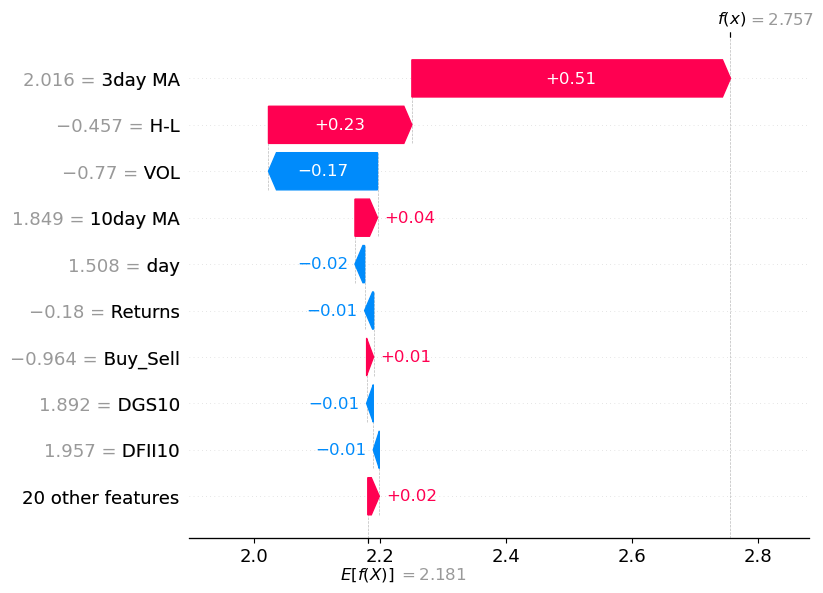

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.11179724426222097
Train performance for GOVT_enrich.csv - RMSE: 0.054928654313154295, MAPE: 0.0017863328934304501
Test performance for GOVT_enrich.csv - RMSE: 0.048951199904632745, MAPE: 0.0017020135783872468


100%|███████████████████████████████████████████| 90/90 [00:20<00:00,  4.39it/s]


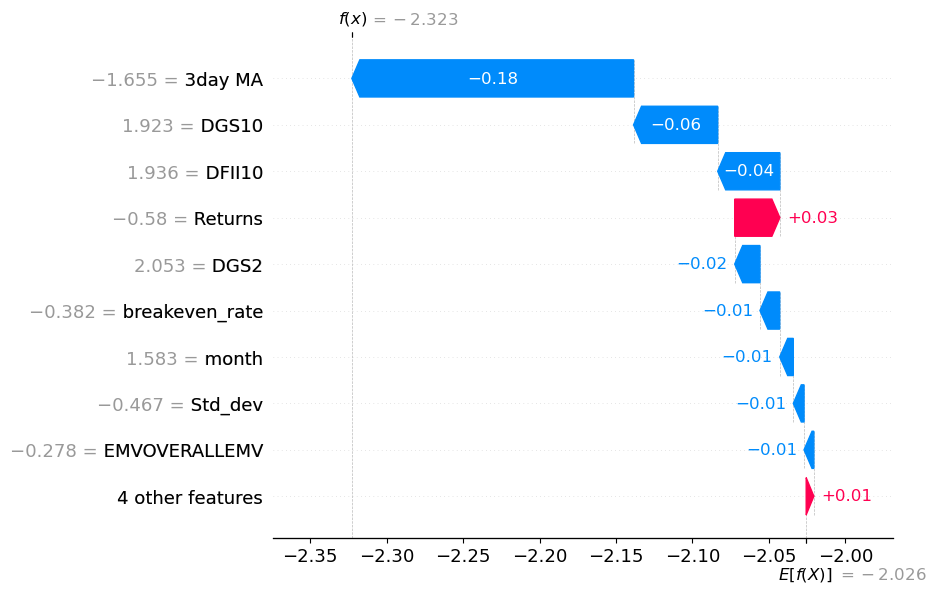

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.014487949990790144
Train performance for IVOO_enrich.csv - RMSE: 0.8044845477143545, MAPE: 0.012059337340565409
Test performance for IVOO_enrich.csv - RMSE: 1.7988903116451003, MAPE: 0.01576681958763804


100%|███████████████████████████████████████████| 90/90 [00:25<00:00,  3.55it/s]


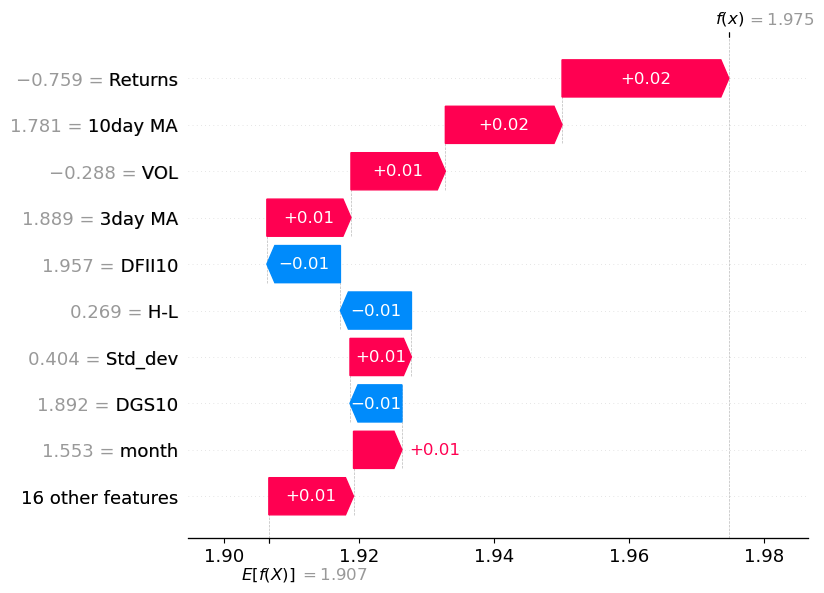

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.006892741730161014
Train performance for JNK_enrich.csv - RMSE: 0.45094528273715234, MAPE: 0.003274337960182694
Test performance for JNK_enrich.csv - RMSE: 0.42339634479423516, MAPE: 0.003524278163709292


100%|███████████████████████████████████████████| 90/90 [00:39<00:00,  2.30it/s]


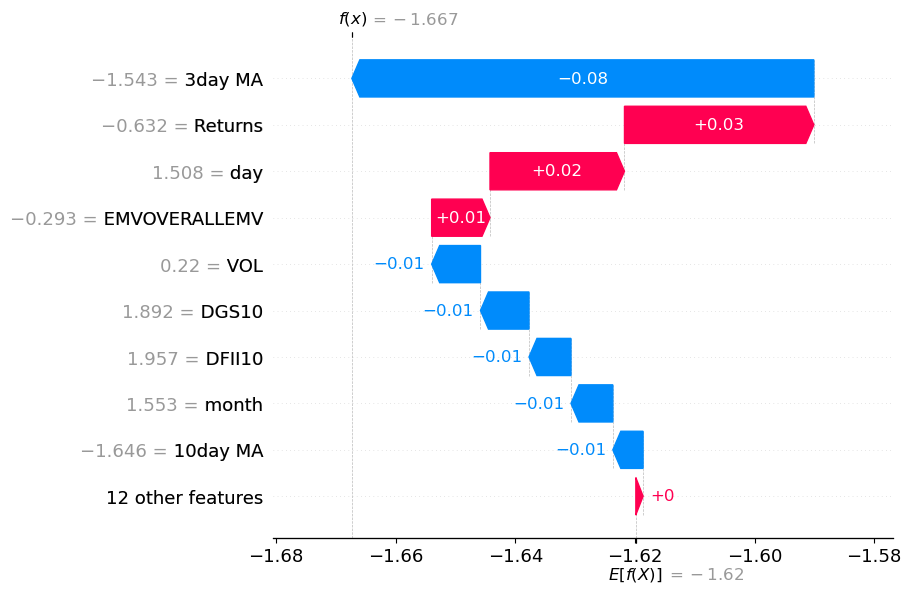

Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.019995713373873496
Train performance for SPY_enrich.csv - RMSE: 8.156176003755506, MAPE: 0.026426749415341778
Test performance for SPY_enrich.csv - RMSE: 17.430900767835354, MAPE: 0.03258483608912293


100%|███████████████████████████████████████████| 90/90 [01:53<00:00,  1.26s/it]


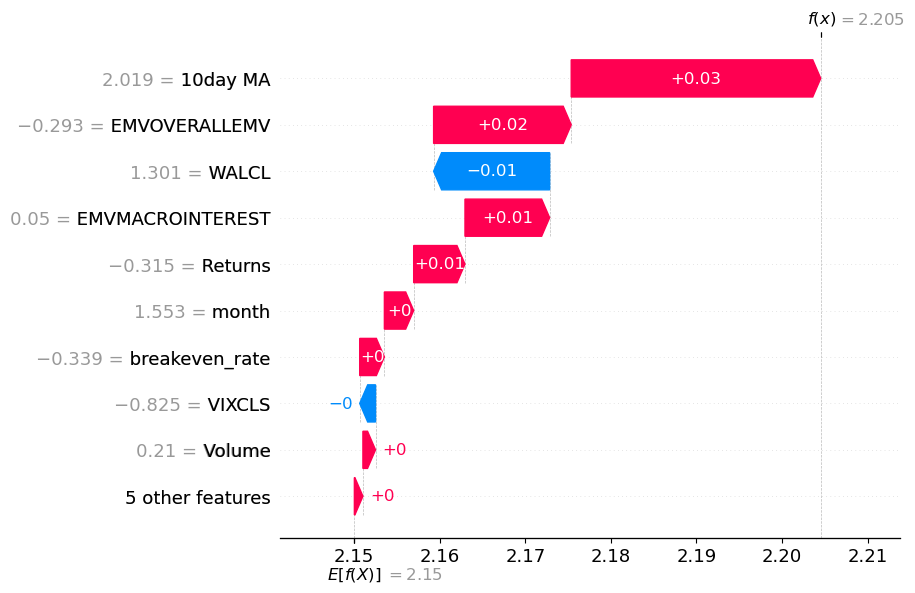

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.023785640567646055
Train performance for VIOO_enrich.csv - RMSE: 0.9184254546292463, MAPE: 0.013442970811624828
Test performance for VIOO_enrich.csv - RMSE: 0.952241388986915, MAPE: 0.007846376455425493


100%|███████████████████████████████████████████| 90/90 [00:24<00:00,  3.68it/s]


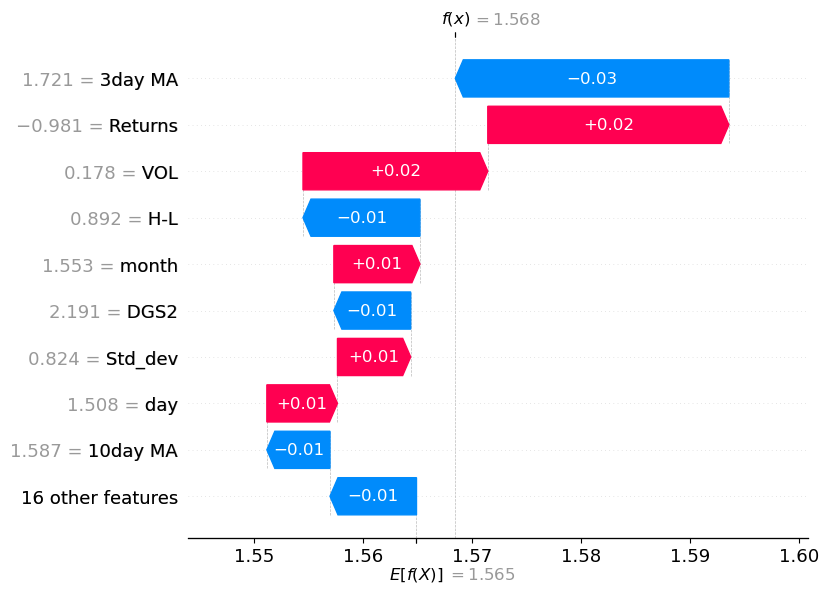

Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.001}
Best cross-validated score: 0.006736503071096915
Train performance for VOO_enrich.csv - RMSE: 4.029656305506531, MAPE: 0.016360051891320334
Test performance for VOO_enrich.csv - RMSE: 13.248104970128141, MAPE: 0.02700472462175976


100%|███████████████████████████████████████████| 90/90 [00:16<00:00,  5.32it/s]


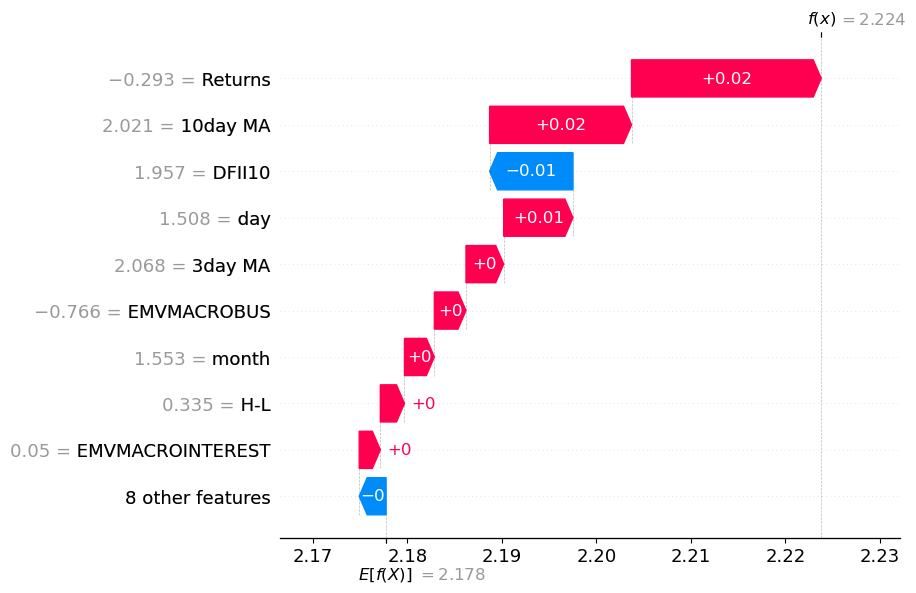

In [3]:

for ticker in selected_features.keys():
    # Read stock_data csv
    stock_data = pd.read_csv(ticker)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    # stock_data = stock_data.drop(columns=['Adj.Close'])
    
    # Daily Volatility % (VOL)
    stock_data['VOL'] = (stock_data['High'] - stock_data['Low']) / stock_data['Open'] * 100
    stock_data = stock_data.drop(columns=['Open', 'High', 'Low'])
    
    # Drop columns with any NA values
    stock_data = stock_data.dropna(axis=1)
    
    # Select predefined features for the current ticker
    features = selected_features[ticker]
    
    # Create a new dataset with the selected features
    newdata = stock_data[['Date'] + features + ['Close']]
    
    # Split new data into training and testing sets
    split_point = len(stock_data) - 90           # Last 90 days for testing
    xr_train = newdata.iloc[:split_point, 1:-1]  # Exclude Date and Close
    xr_test = newdata.iloc[split_point:, 1:-1]   # Exclude Date and Close
    yr_train = newdata.iloc[:split_point, -1]    # Close
    yr_test = newdata.iloc[split_point:, -1]     # Close
    
    # Feature scaling including Close (target variable)
    scaler = StandardScaler()
    xr_train_scaled = pd.DataFrame(scaler.fit_transform(xr_train), columns=xr_train.columns)
    xr_test_scaled = pd.DataFrame(scaler.transform(xr_test), columns=xr_test.columns)
    
    yr_train_scaled = scaler.fit_transform(yr_train.values.reshape(-1, 1)).flatten()
    yr_test_scaled = scaler.transform(yr_test.values.reshape(-1, 1)).flatten()
    
    scaling_params = {'mean': scaler.mean_, 'scale': scaler.scale_}  # Store the scaling parameters
    
    # Function to unscale values
    def unscale_values(scaled_values, scaling_params):
        unscaled_values = scaled_values * scaling_params['scale'][-1] + scaling_params['mean'][-1]
        return unscaled_values


    from sklearn.model_selection import GridSearchCV
    # Hyperparameter tuning for SVM using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'epsilon': [0.1, 0.2, 0.5, 0.3]
    }
    np.random.seed(2024)
    svr = SVR()
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(xr_train_scaled, yr_train_scaled)
    
    # Extract the best model after grid search
    final_model = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validated score: {-grid_search.best_score_}")
    np.random.seed(2023)
    # Train data performance (Unscaled)
    train_preds_scaled = final_model.predict(xr_train_scaled)
    train_preds = unscale_values(train_preds_scaled, scaling_params)
    train_rmse = np.sqrt(mean_squared_error(yr_train, train_preds))
    train_mape = mean_absolute_percentage_error(yr_train, train_preds)
    print(f"Train performance for {ticker} - RMSE: {train_rmse}, MAPE: {train_mape}")
    
    # Test data performance (Unscaled)
    test_preds_scaled = final_model.predict(xr_test_scaled)
    test_preds = unscale_values(test_preds_scaled, scaling_params)
    test_rmse = np.sqrt(mean_squared_error(yr_test, test_preds))
    test_mape = mean_absolute_percentage_error(yr_test, test_preds)
    print(f"Test performance for {ticker} - RMSE: {test_rmse}, MAPE: {test_mape}")
    
    # Plot using unscaled values
    plt.figure(figsize=(6, 6))
    plt.plot(newdata['Date'].iloc[split_point:], yr_test, color='black', lw=2, label='Actual')
    plt.plot(newdata['Date'].iloc[split_point:], test_preds, color='red', lw=2, label='Predicted')
    plt.scatter(newdata['Date'].iloc[split_point:], yr_test, color='black', s=10)
    plt.scatter(newdata['Date'].iloc[split_point:], test_preds, color='red', s=10)
    plt.xticks(rotation=45)
    plt.title(f'Test Performance for {ticker}')
    plt.xlabel('')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.tight_layout()
    plot_filename = f'{os.path.splitext(ticker)[0]}_performance_plot.png'
    plt.savefig(plot_filename)
    plt.close()
    import shap
    import matplotlib.pyplot as plt
    
    # Sample a subset of the training data for the SHAP explainer
    background_sample = shap.sample(xr_train_scaled, 10)  # Adjust the sample size as needed
    
    # Create a SHAP KernelExplainer
    explainer = shap.KernelExplainer(final_model.predict, background_sample)
    
    # Compute SHAP values for the full dataset
    shap_values = explainer.shap_values(xr_train_scaled)
    
    # Plot SHAP summary
    plt.figure()  # Create a new figure
    shap.summary_plot(shap_values, xr_train_scaled, plot_type="bar", feature_names=xr_train_scaled.columns, show=False)
    plt.savefig(f"shap_summary_plot_train_{ticker.split('.')[0]}.png", bbox_inches='tight')
    plt.close()

    # Sample a subset of the training data for the SHAP explainer
    background_sample = shap.sample(xr_test_scaled, 10)  # Adjust the sample size as needed
    
    # Create a SHAP KernelExplainer
    explainer = shap.KernelExplainer(final_model.predict, background_sample)
    
    # Compute SHAP values for the full dataset
    shap_values = explainer.shap_values(xr_test_scaled)

    
    
    # Plot SHAP summary
    plt.figure()  # Create a new figure
    shap.summary_plot(shap_values, xr_train_scaled, plot_type="bar", feature_names=xr_train_scaled.columns, show=False)
    plt.savefig(f"shap_summary_plot_test_{ticker.split('.')[0]}.png", bbox_inches='tight')
    plt.show()

    # Choose an instance to plot the SHAP waterfall plot (e.g., the last instance in the test dataset)
    instance_index = -1  # Last test data entry
    instance_shap_values = shap_values[instance_index]
    
    # Plot the SHAP waterfall plot for the selected instance
    shap.waterfall_plot(
        shap.Explanation(values=instance_shap_values, 
                         base_values=explainer.expected_value, 
                         data=xr_train_scaled.iloc[instance_index],
                         feature_names=xr_train_scaled.columns)
    )
    
    # Save the SHAP waterfall plot
    plt.savefig(f"shap_waterfall_plot_{ticker.split('.')[0]}.png", bbox_inches='tight')
    plt.close()
    
    
    import numpy as np
    # Assuming you have a linear kernel SVM (SVR with linear kernel)
    linear_svm = SVR(kernel='linear')
    linear_svm.fit(xr_train_scaled, yr_train_scaled)
    
    # Get the feature importance (absolute values of the coefficients)
    feature_importance = np.abs(linear_svm.coef_.ravel())
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(np.arange(len(feature_importance)), feature_importance, tick_label=xr_train_scaled.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {ticker} (Linear SVM)")
    plt.savefig(f"Feature_Importance_LinearSVM_{ticker.split('.')[0]}.png", bbox_inches='tight')
    plt.show()

    import lime
    import lime.lime_tabular
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_percentage_error
    
    # LIME Analysis for the last test data entry
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=xr_train_scaled.values,
        feature_names=xr_train_scaled.columns,
        mode='regression'
    )
    
    # Explain the last test instance using LIME
    lime_exp = lime_explainer.explain_instance(
        data_row=xr_test_scaled.iloc[-1].values,
        predict_fn=final_model.predict
    )
    
    # Generate the LIME explanation plot and save it
    fig = lime_exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Last Test Data Entry - {ticker}")
    plt.savefig(f"LIME_Explanation_Last_Test_{ticker.split('.')[0]}.png", bbox_inches='tight')
    plt.show()
    
    # Additional MAPE Calculation and Plot Adjustment
    lime_prediction = final_model.predict(xr_test_scaled.iloc[-1].values.reshape(1, -1))[0]
    actual_value = yr_test.iloc[-1]
    
    # Calculate MAPE for the LIME prediction
    lime_mape = 100 * mean_absolute_percentage_error([actual_value], [lime_prediction])
    mape_text = f'LIME MAPE: {lime_mape:.2f}%'
    
    # Generate the LIME plot
    fig = lime_exp.as_pyplot_figure()
    
    # Add titles and adjust layout
    plt.title(f'Prediction: {lime_prediction:.2f} \n{mape_text}', fontsize=10)
    plt.xlabel('Contribution to Prediction', fontsize=8)
    plt.ylabel('Feature', fontsize=8)
    plt.gcf().set_size_inches(7, 5.8)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"LIME_Prediction_Last_Test_{ticker.split('.')[0]}.png", bbox_inches='tight')
    
    # Show the plot
    plt.show()
